# Jupyter Notebook Version for calculating Pacific Impact on Sahelian Rainfall

In [7]:
import numpy as np  # Used later
from spy4cast import Dataset, Region, Month
from spy4cast.spy4cast import Preprocess, MCA, Crossvalidation

## Configuration

In [8]:
predictor = Dataset("HadISST_sst_chopped.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.APR, monthf=Month.JUN,
           year0=1970, yearf=2000),
)

predictand = Dataset("cru_ts4_pre_chopped.nc", "./datasets").open("pre").slice(
    Region(lat0=0, latf=25,
           lon0=-20, lonf=20,
           month0=Month.JUL, monthf=Month.SEP,
           year0=1970, yearf=2000),
)
#  There is a lag of 3 months (from April to July)

## Methodology

### Preprocessing

In [9]:
# First step. Preprocess variables: anomaly and reshaping
predictor_preprocessed = Preprocess(predictor, period=4, order=4, freq="high")
predictor_preprocessed.save("y_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# Save matrices as .npy for fast loading. To load use:
# predictor_preprocessed = Preprocess.load("y_", "./data-Pacific_Impact_Sahelian_Rainfall/")
predictand_preprocessed = Preprocess(predictand)
predictand_preprocessed.save("z_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# predictand_preprocessed = Preprocess.load("z_", "./data-Pacific_Impact_Sahelian_Rainfall")

[INFO] Preprocessing data for variable sst took: 0.782 seconds
[INFO] Saving Preprocess data in `./data-Pacific_Impact_Sahelian_Rainfall/y_*.npy`
[INFO] Preprocessing data for variable pre took: 0.036 seconds
[INFO] Saving Preprocess data in `./data-Pacific_Impact_Sahelian_Rainfall/z_*.npy`


### MCA

In [10]:
# Second step. MCA: expansion coefficients and correlation and regression maps
nm = 3
alpha = 0.1
mca = MCA(predictor_preprocessed, predictand_preprocessed, nm, alpha)
mca.save("mca_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# mca = MCA.load("mca_", "./data-Pacific_Impact_Sahelian_Rainfall/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Loading MCA data from `./data-Pacific_Impact_Sahelian_Rainfall/mca_*` took 0.160 seconds


### Crossvalidation

In [11]:
# Third step. Crossvalidation: skill and hidcast evaluation and products
cross = Crossvalidation(predictor_preprocessed, predictand_preprocessed, nm, alpha)
cross.save("cross_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# cross = Crossvalidation.load("cross_", "./data-Pacific_Impact_Sahelian_Rainfall/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Loading Crossvalidation data from `./data-Pacific_Impact_Sahelian_Rainfall/cross_*` took 0.038 seconds


## Plotting results

[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/mca.png
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/cross.png
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/zhat_1999.png


(<Figure size 1200x1000 with 5 Axes>,
 (<GeoAxesSubplot:title={'center':'Y on year 1999'}>,
  <GeoAxesSubplot:title={'center':'Zhat on year 1999'}>,
  <GeoAxesSubplot:title={'center':'Z on year 1999'}>))

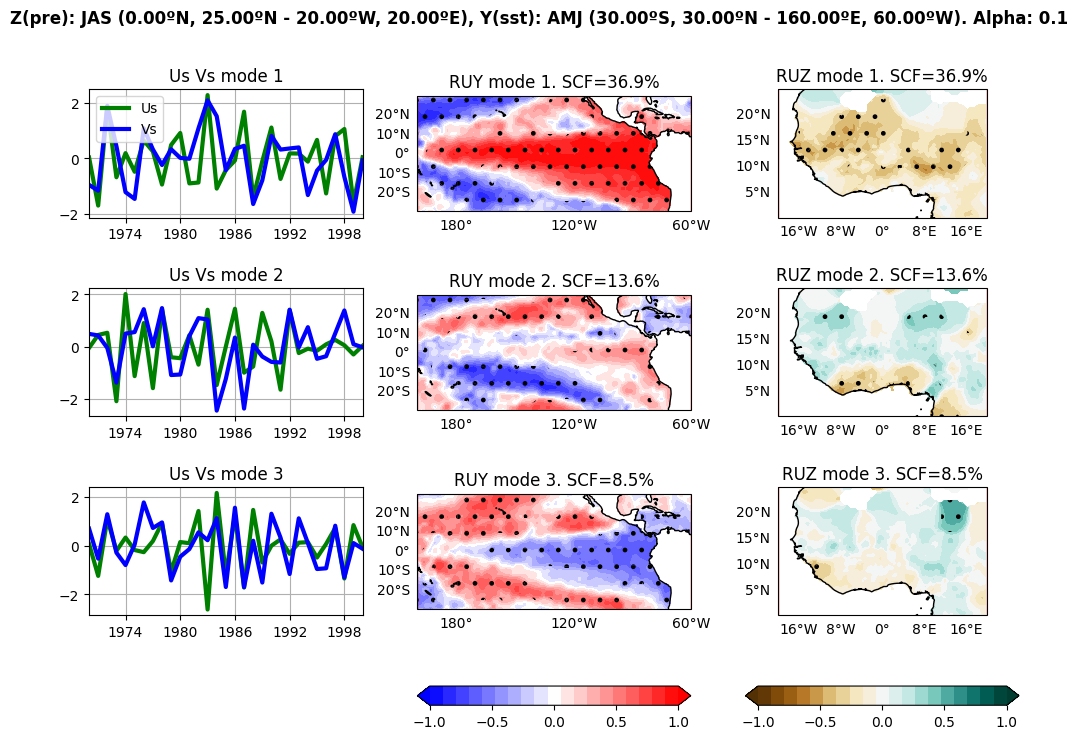

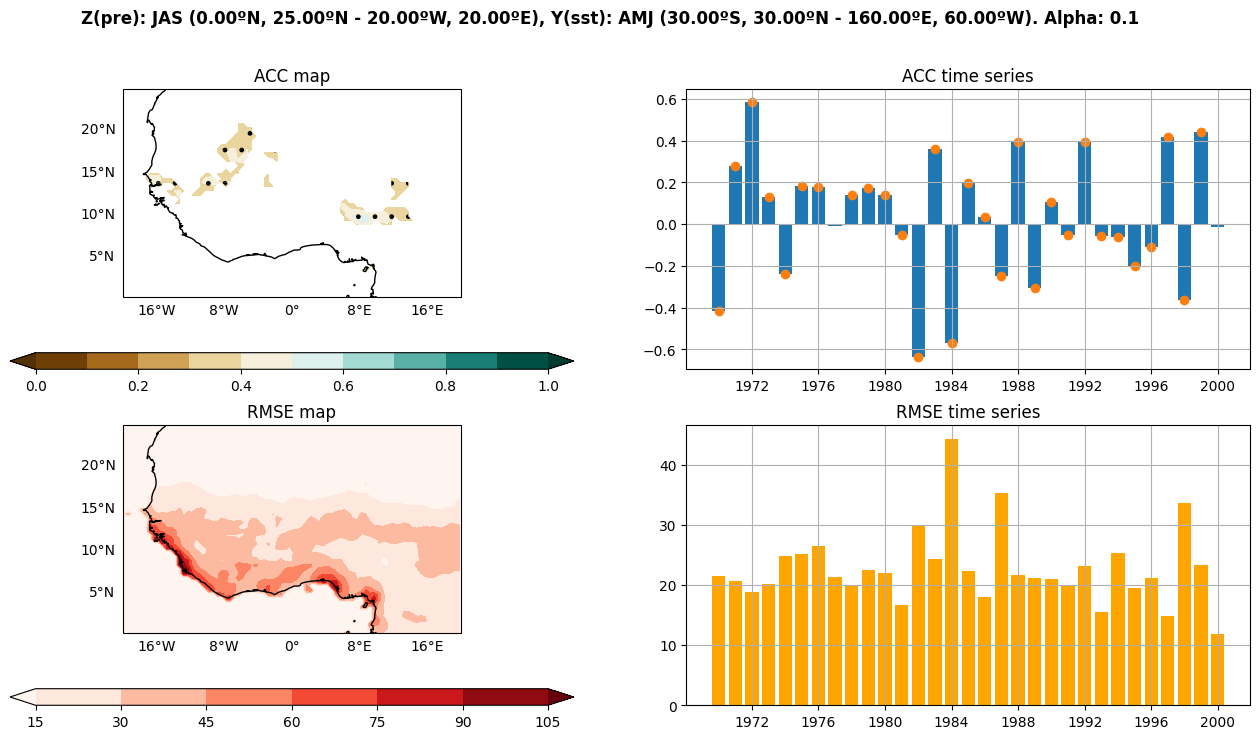

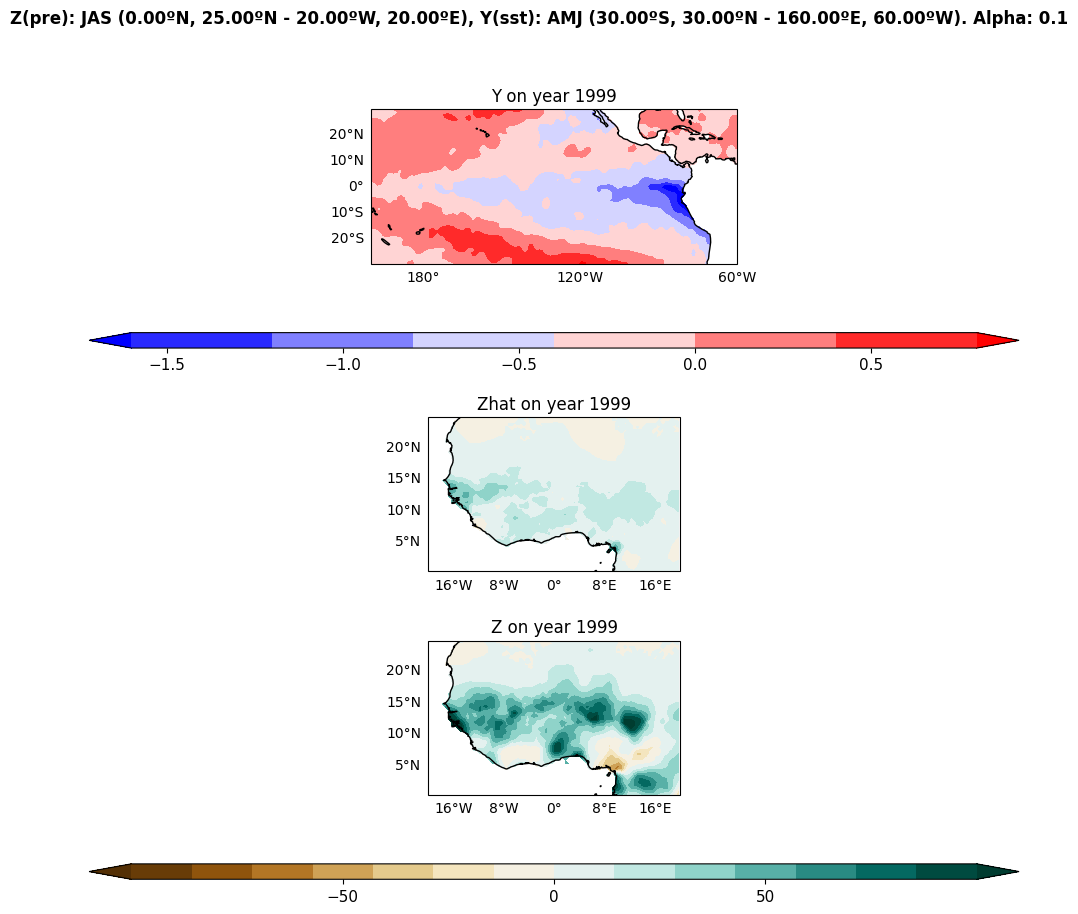

In [12]:
mca.plot(
    save_fig=True, cmap="BrBG", name="mca.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    ruy_ticks=[-1, -0.5, 0, 0.5, 1],
    ruz_ticks=[-1, -0.5, 0, 0.5, 1],
    width_ratios=[1, 1, 1],
)
cross.plot(
    save_fig=True, name="cross.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    cmap="BrBG", 
    map_ticks=np.arange(0, 1.1, .2),
    map_levels=np.arange(0, 1.1, .1),
)
cross.plot_zhat(1999, figsize=(12, 10), save_fig=True, name="zhat_1999.png", 
                folder="./plots-Pacific_Impact_Sahelian_Rainfall/", cmap="BrBG", 
                z_levels=np.linspace(-100, 100, 15))

[INFO] Preprocessing data for variable sst took: 0.517 seconds
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/mca2.png


((<Figure size 1200x800 with 11 Axes>,),
 (<AxesSubplot:title={'center':'Us Vs mode 1'}>,
  <AxesSubplot:title={'center':'Us Vs mode 2'}>,
  <AxesSubplot:title={'center':'Us Vs mode 3'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 1. SCF=36.9%'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 2. SCF=13.6%'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 3. SCF=8.5%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 1. SCF=36.9%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 2. SCF=13.6%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 3. SCF=8.5%'}>))

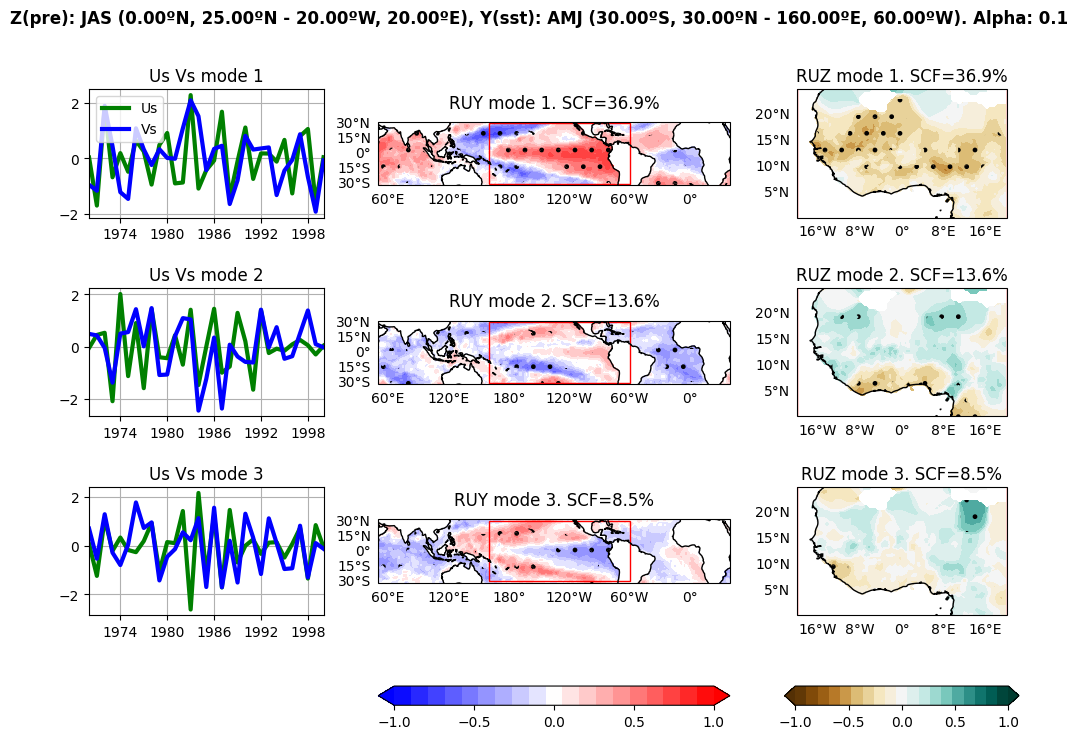

In [13]:
# Plot regression on a bigger map

map_y = Dataset("HadISST_sst_chopped.nc", "./datasets").open("sst").slice(
    Region(lat0=-32, latf=32,
           lon0=-309.5, lonf=39.5,
           month0=Month.APR, monthf=Month.JUN,
           year0=1970, yearf=2000),
)

map_y_pre = Preprocess(map_y)

mca.plot(
    save_fig=True, cmap="BrBG", name="mca2.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    ruy_ticks=[-1, -0.5, 0, 0.5, 1],
    ruz_ticks=[-1, -0.5, 0, 0.5, 1],
    width_ratios=[2, 3, 2],
    map_y=map_y_pre)

## Analyze the importance of the frist 3 modes

[INFO] Saving plot with path plots-Pacific_Impact_Sahelian_Rainfall/cross2.png


((<Figure size 1000x800 with 18 Axes>,),
 (<AxesSubplot:title={'center':'Mode 1, |ruv|=0.53 p=0.998'}, xlabel='Years', ylabel='nº std'>,
  <AxesSubplot:title={'center':'Mode 1, |ruv|=0.53 , scf=36.91%'}, xlabel='Years', ylabel='|ruv|'>,
  <GeoAxesSubplot:title={'center':'ACC 1 modes'}>,
  <AxesSubplot:title={'center':'Skill (bars), \n MSESS (lines)'}>,
  <AxesSubplot:title={'center':'Mode 2, |ruv|=0.56 p=0.999'}, xlabel='Years'>,
  <AxesSubplot:title={'center':'Mode 2, |ruv|=0.56 , scf=13.63%'}, xlabel='Years'>,
  <GeoAxesSubplot:title={'center':'ACC 2 modes'}>,
  <GeoAxesSubplot:title={'center':'ACC [1 2]) - [1]'}>,
  <AxesSubplot:title={'center':'Mode 3, |ruv|=0.59 p=1.000'}, xlabel='Years'>,
  <AxesSubplot:title={'center':'Mode 3, |ruv|=0.59 , scf=8.48%'}, xlabel='Years'>,
  <GeoAxesSubplot:title={'center':'ACC 3 modes'}>,
  <GeoAxesSubplot:title={'center':'ACC [1 2 3]) - [1 2]'}>))

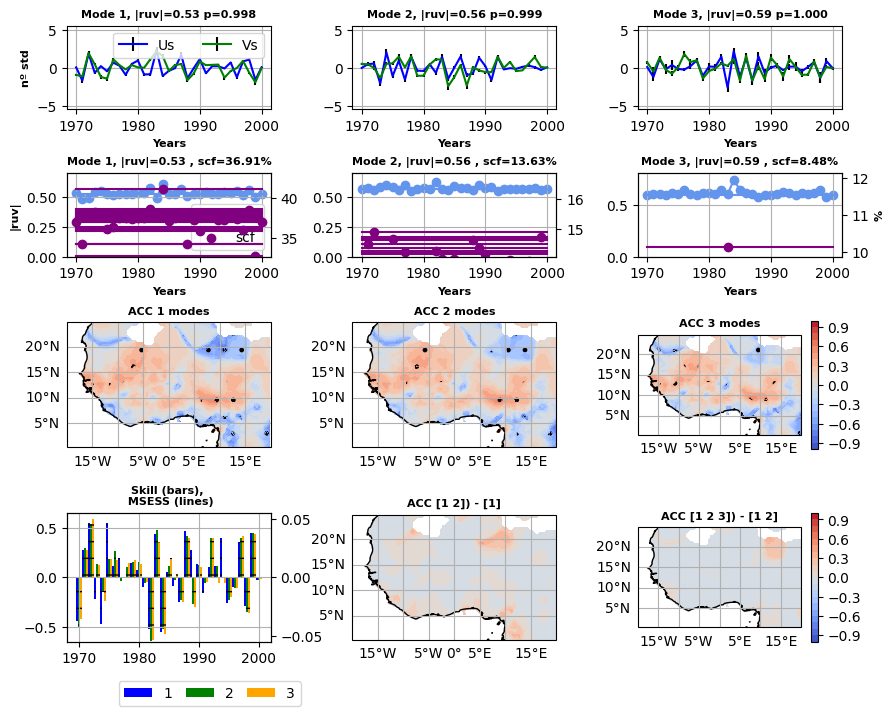

In [14]:
cross.plot(
    version=2, mca=mca,
    figsize=(10, 8),
    folder="plots-Pacific_Impact_Sahelian_Rainfall/",
    name="cross2.png",
    save_fig=True,
)